<a href="https://colab.research.google.com/github/Shaimaan-Shaikh/Car_price_prediction_project/blob/main/Car_price_prediction_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TITLE OF PROJECT : CAR PRICE PREDICTION**

# **OBJECTIVE: CAR PRICE PREDICTION USING MACHINE LEARNING**

# **DATA SOURCE:** https://github.com/YBIFoundation/Dataset/raw/main/Car%20Price.csv

**IMPORT LIBRARY**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

**IMPORT DATA**

In [ ]:
car_dataset = pd.read_csv("https://github.com/YBIFoundation/Dataset/raw/main/Car%20Price.csv")

**DESCRIBE DATA**

In [ ]:
car_dataset.head()

,Brand,Model,Year,Selling_Price,KM_Driven,Fuel,Seller_Type,Transmission,Owner
0,Maruti,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [ ]:
car_dataset.shape

(4340, 9)

In [ ]:
car_dataset = pd.get_dummies(car_dataset, columns=['Owner'])

In [ ]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Brand                       4340 non-null   object
 1   Model                       4340 non-null   object
 2   Year                        4340 non-null   int64 
 3   Selling_Price               4340 non-null   int64 
 4   KM_Driven                   4340 non-null   int64 
 5   Fuel                        4340 non-null   object
 6   Seller_Type                 4340 non-null   object
 7   Transmission                4340 non-null   object
 8   Owner_First Owner           4340 non-null   bool  
 9   Owner_Fourth & Above Owner  4340 non-null   bool  
 10  Owner_Second Owner          4340 non-null   bool  
 11  Owner_Test Drive Car        4340 non-null   bool  
 12  Owner_Third Owner           4340 non-null   bool  
dtypes: bool(5), int64(3), object(5)
memory usage: 29

**DATA VISUALIZATION**

In [ ]:
car_dataset.isnull().sum()

Brand                         0
Model                         0
Year                          0
Selling_Price                 0
KM_Driven                     0
Fuel                          0
Seller_Type                   0
Transmission                  0
Owner_First Owner             0
Owner_Fourth & Above Owner    0
Owner_Second Owner            0
Owner_Test Drive Car          0
Owner_Third Owner             0
dtype: int64

In [ ]:
print(car_dataset.Fuel.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64
Seller_Type
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: count, dtype: int64
Transmission
Manual       3892
Automatic     448
Name: count, dtype: int64


**DATA PREPROCESSING**

In [ ]:
car_dataset.replace({'Fuel':{'Diesel':0, 'Petrol':1, 'CNG':2, 'LPG':3, 'Electric':4}},inplace=True)

car_dataset.replace({'Seller_Type':{'Individual':0, 'Dealer':1, 'Trustmark Dealer':2}},inplace=True)

car_dataset.replace({'Transmission':{'Manual':0, 'Automatic':1}},inplace=True)

In [ ]:
car_dataset.head()

,Brand,Model,Year,Selling_Price,KM_Driven,Fuel,Seller_Type,Transmission,Owner_First Owner,Owner_Fourth & Above Owner,Owner_Second Owner,Owner_Test Drive Car,Owner_Third Owner
0,Maruti,Maruti 800 AC,2007,60000,70000,1,0,0,True,False,False,False,False
1,Maruti,Maruti Wagon R LXI Minor,2007,135000,50000,1,0,0,True,False,False,False,False
2,Hyundai,Hyundai Verna 1.6 SX,2012,600000,100000,0,0,0,True,False,False,False,False
3,Datsun,Datsun RediGO T Option,2017,250000,46000,1,0,0,True,False,False,False,False
4,Honda,Honda Amaze VX i-DTEC,2014,450000,141000,0,0,0,False,False,True,False,False


**DEFINE TARGET VARIABLE (y) AND FEATURE VARIABLE (X)**

In [ ]:
x = car_dataset.drop(['Brand', 'Model', 'Selling_Price'], axis=1)
y = car_dataset['Selling_Price']

In [ ]:
print(x)

      Year  KM_Driven  Fuel  Seller_Type  Transmission  Owner_First Owner  \
0     2007      70000     1            0             0               True   
1     2007      50000     1            0             0               True   
2     2012     100000     0            0             0               True   
3     2017      46000     1            0             0               True   
4     2014     141000     0            0             0              False   
...    ...        ...   ...          ...           ...                ...   
4335  2014      80000     0            0             0              False   
4336  2014      80000     0            0             0              False   
4337  2009      83000     1            0             0              False   
4338  2016      90000     0            0             0               True   
4339  2016      40000     1            0             0               True   

      Owner_Fourth & Above Owner  Owner_Second Owner  Owner_Test Drive Car 

In [ ]:
print(y)

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: Selling_Price, Length: 4340, dtype: int64


**TRAIN-TEST SPLIT**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2)

**MODELING**

In [ ]:
lin_reg_model = LinearRegression()

In [ ]:
lin_reg_model.fit(x_train, y_train)

LinearRegression()

**MODEL EVALUATION**

In [ ]:
training_data_prediction = lin_reg_model.predict(x_train)

In [ ]:
error_score = metrics.r2_score(y_train, training_data_prediction)
print("R square Error: ", error_score)

R square Error:  0.4409543984543086


In [ ]:
test_data_prediction = lin_reg_model.predict(x_test)

In [ ]:
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R square Error: ", error_score)

R square Error:  0.48215349965103793


**PREDICITION**

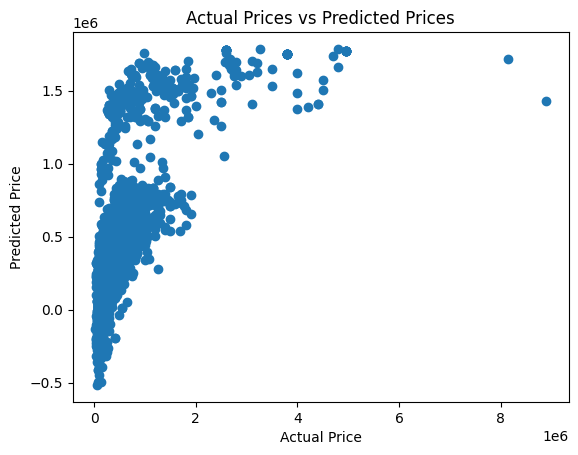

In [ ]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

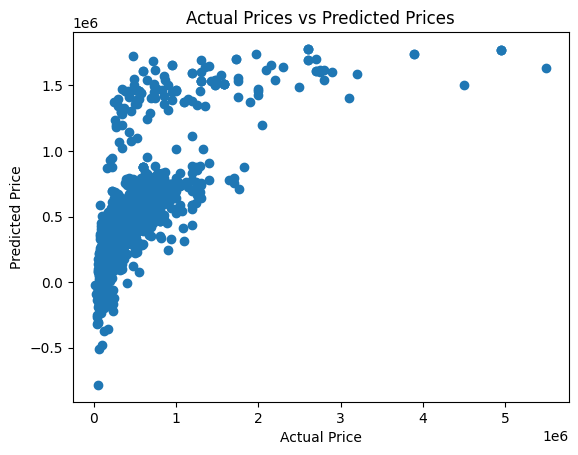

In [ ]:
plt.scatter(y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

**LASSO REGRESSION**

In [ ]:
lass_reg_model = Lasso()

In [ ]:
lass_reg_model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.360e+12, tolerance: 1.089e+11
  model = cd_fast.enet_coordinate_descent(


Lasso()

**MODEL EVALUATION**

In [ ]:
training_data_prediction = lass_reg_model.predict(x_train)

In [ ]:
error_score = metrics.r2_score(y_train, training_data_prediction)
print("R square Error: ", error_score)

R square Error:  0.4409543974814104


In [ ]:
test_data_prediction = lass_reg_model.predict(x_test)

In [ ]:
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R square Error: ", error_score)

R square Error:  0.48215326695380245


**PREDICITION**

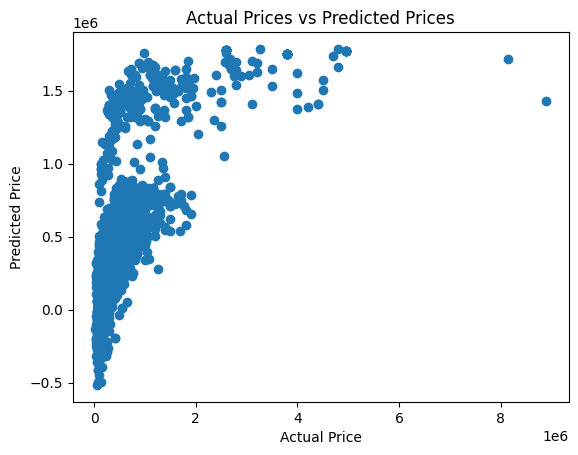

In [ ]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

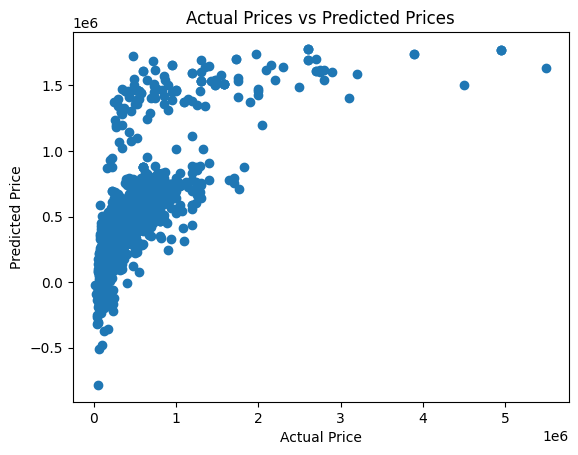

In [ ]:
plt.scatter(y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

**EXPLAINATION**

THIS PROBLEM IS SOLVED USING 'LINEAR REGRESSION; AND 'LASSO REGRESSION' MODEL WHICH HELPS US TO PREDICT THE CAR PRICE AND GIVE US RESULT IN PLOTED FORM. THE RESULT PREDICT THE ACTUAL PRICE OF THE CAR.